# **Build first neural network in Keras for image classification problem**
We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense,Activation

In [4]:
keras.backend.backend()

'tensorflow'

In [0]:
fm=keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
X_test.shape

(10000, 28, 28)

In [36]:
X_train[0]   #pixel values of first item in X_train

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [37]:
y_train[0]

9

## **pixel images of some items in X_train datasets**

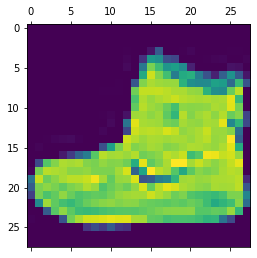

In [38]:
#matshow is used to visualize matrix 
plt.matshow(X_train[0])   # ankle boot

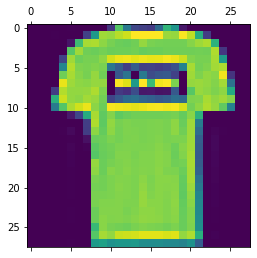

In [39]:
plt.matshow(X_train[1])  # t-shirt

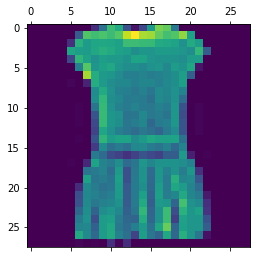

In [40]:
plt.matshow(X_train[3])

## **Normalize training data before training the neural net**

In [0]:
X_train=X_train/255

In [0]:
X_test=X_test/255

## **Build the Sequential Model and add layers into it**

In [0]:
model=Sequential()
#input layer of 28*28 size
model.add(Flatten(input_shape=[28,28]))
#adding 100 hidden layers
model.add(Dense(100,activation='relu'))
#output layer contains 10 neorons for classification of different items
model.add(Dense(10,activation='softmax'))

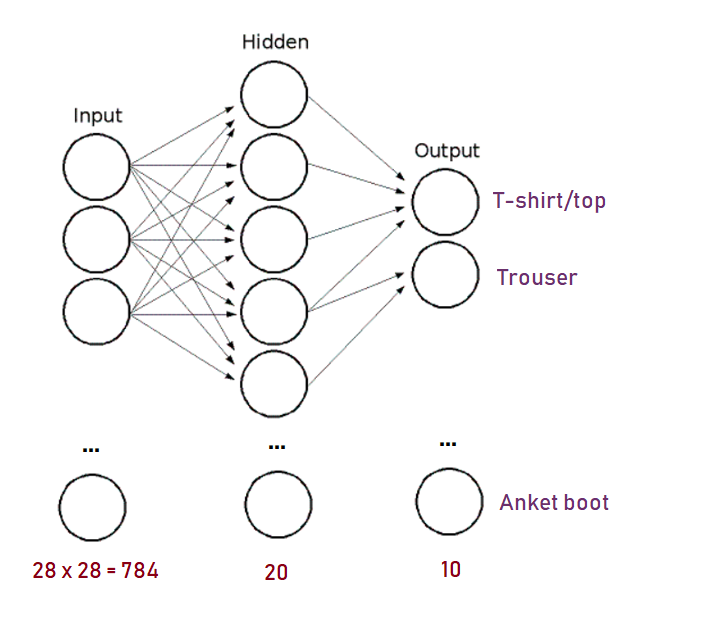

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [48]:
model.fit(X_train,y_train,epochs=7)

Epoch 1/7
60000/60000 [==============================] - 4s 64us/step - loss: 0.3790 - accuracy: 0.8637
Epoch 2/7
60000/60000 [==============================] - 4s 63us/step - loss: 0.3428 - accuracy: 0.8744
Epoch 3/7
60000/60000 [==============================] - 4s 62us/step - loss: 0.3180 - accuracy: 0.8834
Epoch 4/7
60000/60000 [==============================] - 4s 62us/step - loss: 0.2990 - accuracy: 0.8907
Epoch 5/7
60000/60000 [==============================] - 4s 64us/step - loss: 0.2863 - accuracy: 0.8935
Epoch 6/7
60000/60000 [==============================] - 4s 64us/step - loss: 0.2740 - accuracy: 0.8989
Epoch 7/7
60000/60000 [==============================] - 4s 63us/step - loss: 0.2634 - accuracy: 0.9018


In [61]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/step


[0.34677743563652036, 0.8777999877929688]

Above shows loss of 0.347 and accuracy score of 87.78%.

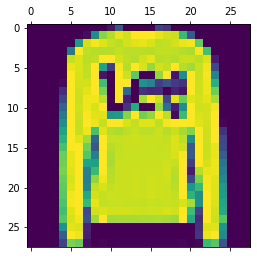

In [81]:
plt.matshow(X_test[1])   

# now we will predict this pixel image using our model

## **Predicting the pixel image using X_test dataset**

In [0]:
y_pred=model.predict(X_test)

In [79]:
y_pred[1]

array([1.5213111e-04, 4.4698693e-11, 9.9369204e-01, 9.2573522e-09,
       4.0617436e-03, 1.3316451e-07, 2.0939284e-03, 1.3969635e-09,
       9.0911512e-10, 5.1378624e-12], dtype=float32)

In [0]:
# class labels contains different items which are assigned to output layer
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [80]:
class_labels[np.argmax(y_pred[1])]

'Pullover'

Model Prediction of pixel images


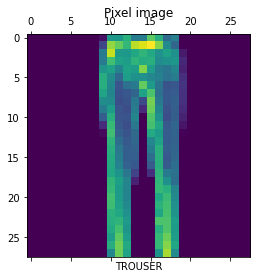

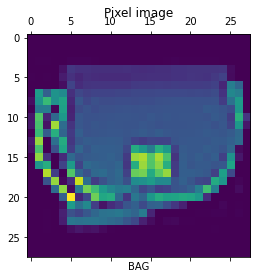

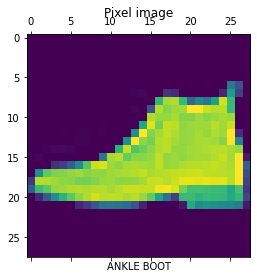

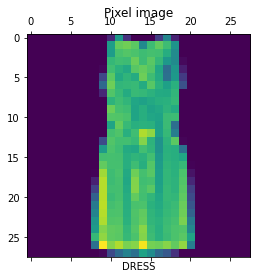

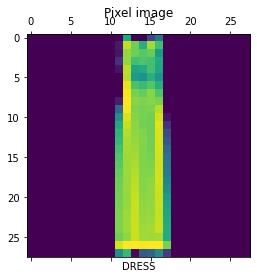

In [102]:
print("Model Prediction of pixel images")

for j in range(6,11):
  i=np.random.choice(len(X_test))
  plt.matshow(X_test[i])
  plt.title("Pixel image")
  plt.xlabel(class_labels[np.argmax(y_pred[i])].upper())

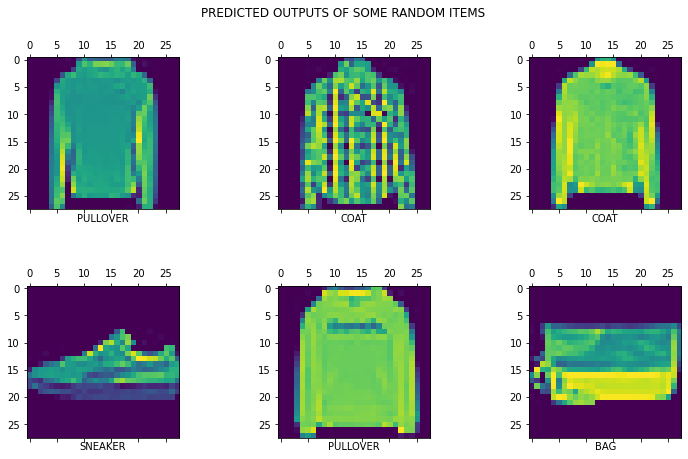

In [104]:
images=np.random.choice(len(X_test),size=6)
fig=plt.figure(figsize=(12,7))
fig.suptitle("predicted outputs of some random items".upper())
fig.subplots_adjust(hspace=0.5,wspace=0.5)

for i,num in zip(images,range(1,7)):
  ax=fig.add_subplot(2,3,num)
  ax.matshow(X_test[i])
  ax.set_xlabel(class_labels[np.argmax(y_pred[i])].upper())
